In [16]:
import pandas as pd

full_df = pd.read_feather('../data/data.feather')

n_answered = full_df.filter(regex="^q\d+").notna().sum(axis=1)

n=2300

heavy_users = full_df[n_answered>n].copy()
heavy_users['n'] = n_answered[n_answered>n]

q_df = heavy_users.filter(regex='^q\d+')
dummies_df = pd.get_dummies(q_df, dummy_na=True)
dummies_df.shape

(828, 9879)

In [17]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2)
latent_features = svd.fit_transform(dummies_df)

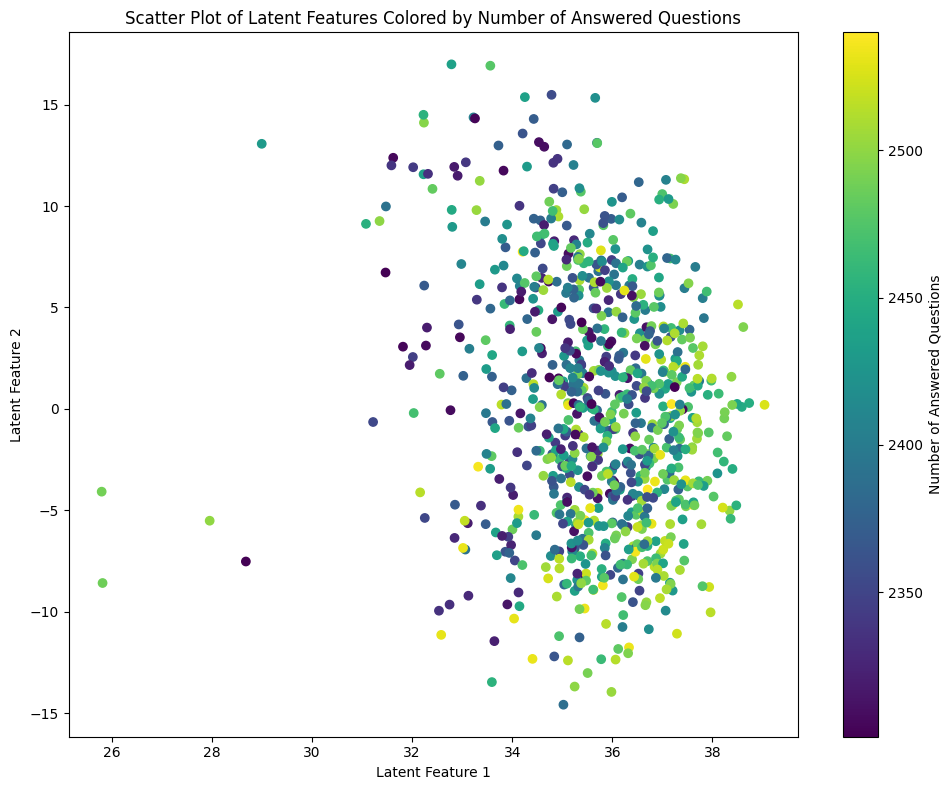

In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Assuming dummies_df and latent_features are already defined
# and n_answered is a pandas Series

plt.figure(figsize=(10, 8))
scatter = plt.scatter(latent_features[:, 0], latent_features[:, 1], c=n_answered[n_answered>n], cmap='viridis')
cbar = plt.colorbar(scatter)
cbar.set_label('Number of Answered Questions')
plt.xlabel('Latent Feature 1')
plt.ylabel('Latent Feature 2')
plt.title('Scatter Plot of Latent Features Colored by Number of Answered Questions')
plt.tight_layout()
plt.show()

In [6]:
full_df[n_answered>2300]

,q2,q11,q12,q13,q14,q16,q17,q18,q20,q22,...,q86615,q86699,q363047,CA,gender_orientation,gender,race,gender2,gender2_num,CA_items
1779,more cool than pathetic,Aroused,NaN,No,No,NaN,No,No,Yes,No,...,No.,"No, of course not.",NaN,-0.692630,Hetero_male,Man,White,Man,1.0,6.0
3666,more pathetic than cool,Horrified,No,Yes,Yes,NaN,No,No,Yes,No,...,No.,"Yes, without restrictions.",NaN,1.142376,Hetero_male,Man,White,Man,1.0,13.0
10234,more pathetic than cool,Aroused,Yes,No,No,No,Yes,Yes,Yes,Yes,...,Only if I couldn't get it for free.,"Yes, but only if certain criteria are met.",Yes,0.952415,Bisexual_male,Man,White,Man,1.0,11.0
11343,more pathetic than cool,Indifferent,Yes,No,No,NaN,No,No,Yes,No,...,No.,"Yes, but only if certain criteria are met.",NaN,-0.068454,Hetero_male,Man,White,Man,1.0,8.0
12596,more pathetic than cool,Horrified,No,No,No,Yes,No,No,Yes,Yes,...,NaN,I'm not sure.,Yes,1.465189,Hetero_male,Man,White,Man,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66273,more pathetic than cool,Indifferent,Yes,No,No,Yes,No,No,Yes,No,...,Only if I couldn't get it for free.,"Yes, but only if certain criteria are met.",NaN,1.434237,Hetero_male,Man,White,Man,1.0,13.0
66295,more pathetic than cool,Aroused,Yes,No,No,NaN,Yes,No,No,No,...,No.,"Yes, but only if certain criteria are met.",NaN,0.789746,Hetero_male,Man,Other,Man,1.0,11.0
66545,NaN,Horrified,Yes,No,No,NaN,No,No,NaN,No,...,No.,"Yes, but only if certain criteria are met.",NaN,-1.315509,Bisexual_female,Woman,Black,Woman,0.0,3.0
67349,NaN,Indifferent,Yes,No,No,NaN,No,No,Yes,No,...,Only if I couldn't get it for free.,"Yes, but only if certain criteria are met.",NaN,-0.528603,Hetero_male,Man,White,Man,1.0,2.0


In [6]:
heavy_users.filter(regex='^q\d+').shape

(1775, 2541)